In [1]:
# install.packages("useful")
# install.packages("gridExtra")
### 特徵分析 ###
# 安裝 VCD工作包
# install.packages("vcd")
#安裝資料清理工作包 dplyr
# install.packages("dplyr")

In [2]:
gc()

#設定工作目錄
setwd("/Users/huangyiling/GitHub/EB101_TeamSpade_project/DataModel/people_Model2")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,519462,27.8,1163017,62.2,642320,34.4
Vcells,986932,7.6,8388608,64.0,1774266,13.6


In [3]:
library(useful)
library(factoextra)
library(gridExtra)
library(vcd)
library(dplyr)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Loading required package: grid

Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
#讀取資料集
#Old:
# x=read.table("peopleSample.csv", header=T, sep=",") 

#New:
y=read.table("peopleSample2_combind.csv", header=T, sep=",") 
# y.rename(columns={'Dim.1':'Axis1','Dim.2':'Axis2', 'Dim.3':'Axis3','Dim.4':'Axis4','Dim.5':'Axis5','Dim.6':'Axis6'}, inplace = True)
# tail(x)

x=y[-1]
# head(y)
head(x)

X,Sex,Age,Height,Weight,BMI,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
1,0,19,140,31.4,16,7.309496,-2.491850,1.687188,-1.383729,-0.8596980,-0.5073995
2,0,19,141,31.8,16,7.179639,-2.492527,1.709365,-1.309765,-0.8637055,-0.5091947
3,0,19,142,32.3,16,7.020048,-2.493320,1.735199,-1.231417,-0.8570972,-0.5073872
4,0,19,143,32.7,16,6.879438,-2.494036,1.758421,-1.157395,-0.8587715,-0.5090307
5,0,19,144,33.2,16,6.730682,-2.494791,1.783141,-1.079256,-0.8547171,-0.5074889
6,0,19,145,33.6,16,6.590405,-2.495506,1.806206,-1.005536,-0.8568692,-0.5093630


In [5]:
#新資料 讀取切割變數
# model_data <- data.frame(x$Dim.1,x$Dim.2,x$Dim.3,x$Dim.4,x$Dim.5,x$Dim.6)
x_data <- data.frame(x$Dim.1,x$Dim.2,x$Dim.3,x$Dim.4,x$Dim.5,x$Dim.6)
model_data<-scale(x_data)

In [6]:
# distance <- get_dist(model_data)
# fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

In [7]:
#設定隨機種子
set.seed(500)

In [8]:
#設定組內距離平方和變數
WSS_ratio <- rep(NA, times = 10) 

In [9]:
#建置
for (k in 1:length(WSS_ratio)) 
{
  Cluster_km <- kmeans(model_data[-1], nstart=15,centers=k) 
  WSS_ratio[k] <- Cluster_km$tot.withinss
}

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 27359950)”

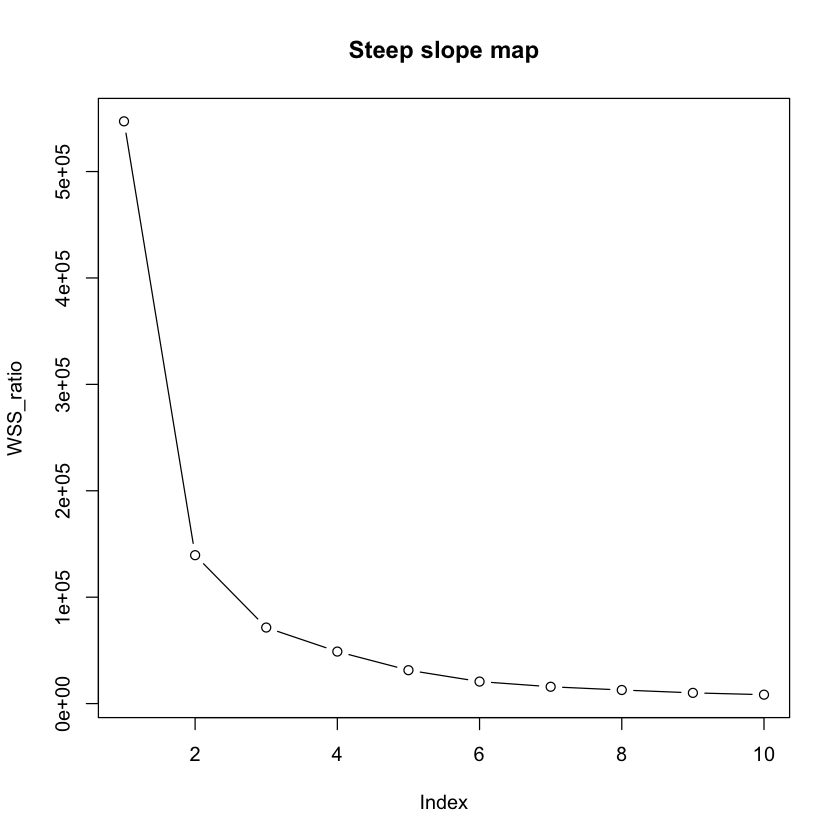

In [10]:
#畫陡坡圖
plot(WSS_ratio, type="b", main = "Steep slope map")

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage

Clusters,Hartigan,AddCluster
2,273592.80,TRUE
3,113995.28,TRUE
4,70929.62,TRUE
5,51295.77,TRUE
6,40124.82,TRUE
7,32928.93,TRUE
8,27915.36,TRUE
9,24220.28,TRUE
10,21389.67,TRUE
11,19146.83,TRUE


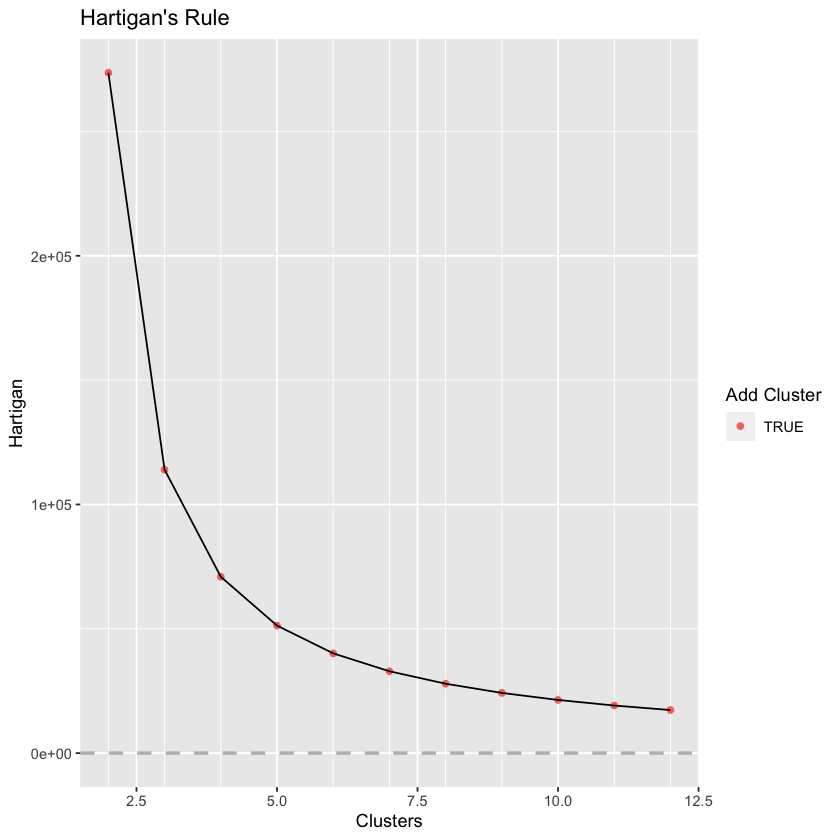

In [11]:
dataAct = FitKMeans(x, max.clusters=12, nstart=25, seed=500)
dataAct
PlotHartigan(dataAct)

In [12]:
#建模，設定不同群數K
Cluster_km_2 <- kmeans(model_data, nstart=15,centers=2) 
Cluster_km_3 <- kmeans(model_data, nstart=15,centers=3)
Cluster_km_4 <- kmeans(model_data, nstart=15,centers=4)
Cluster_km_5 <- kmeans(model_data, nstart=15,centers=5)
Cluster_km_6 <- kmeans(model_data, nstart=15,centers=6)
Cluster_km_7 <- kmeans(model_data, nstart=15,centers=7)
Cluster_km_8 <- kmeans(model_data, nstart=15,centers=8)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4560000)”

### Cluster 2 

In [13]:
# Cluster_km_2
c2 = Cluster_km_2$cluster
# str(Cluster_km_2)
write.csv(c2,"cluster2.csv", row.names = FALSE)

In [14]:
#將原始資料集與模型結果進行比對
final_data_2 <- data.frame(x,cluster=as.character(c2))  

#轉成dplyr格式
with_model_data_2 <- tbl_df( final_data_2 ) 

Warning message:
“`tbl_df()` is deprecated as of dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

In [15]:
#New_分析各群切割變數
result <-with_model_data_2 %>% dplyr::group_by(cluster) %>% summarise(
  count = n(),
  median_A1 = median(Dim.1, na.rm = TRUE), 
  median_A2 = median(Dim.2, na.rm = TRUE),
  median_A3 = median(Dim.3, na.rm = TRUE),
  median_A4 = median(Dim.4, na.rm = TRUE),
  median_A5 = median(Dim.5, na.rm = TRUE),
  median_A6 = median(Dim.6, na.rm = TRUE)
  ) 

#結果寫出成5c6sv檔
write.table(result , file='people_kMeans_result2.csv', col.names=T, row.names=F, sep=",", quote = F) 

`summarise()` ungrouping output (override with `.groups` argument)


In [16]:
#查看各群的人
subset(final_data_2, final_data_2$cluster==1)[,1:7] 
subset(final_data_2, final_data_2$cluster==2)[,1:7] 

,X,Sex,Age,Height,Weight,BMI,Dim.1
25601,25601,0,51,140,31.4,16,7.583714
25602,25602,0,51,141,31.8,16,7.456625
25603,25603,0,51,142,32.3,16,7.298032
25604,25604,0,51,143,32.7,16,7.171026
25605,25605,0,51,144,33.2,16,7.013879
25606,25606,0,51,145,33.6,16,6.876370
25607,25607,0,51,146,34.1,16,6.728612
25608,25608,0,51,147,34.6,16,6.570924
25609,25609,0,51,148,35.0,16,6.436725
25610,25610,0,51,149,35.5,16,6.289622


X,Sex,Age,Height,Weight,BMI,Dim.1
1,0,19,140,31.4,16,7.309496
2,0,19,141,31.8,16,7.179639
3,0,19,142,32.3,16,7.020048
4,0,19,143,32.7,16,6.879438
5,0,19,144,33.2,16,6.730682
6,0,19,145,33.6,16,6.590405
7,0,19,146,34.1,16,6.430980
8,0,19,147,34.6,16,6.270190
9,0,19,148,35.0,16,6.144382
10,0,19,149,35.5,16,5.983676


In [17]:
100*prop.table( table(final_data_2$cluster,final_data_2$Sex) ,1) 
100*prop.table( table(final_data_2$cluster,final_data_2$Age) ,1)
100*prop.table( table(final_data_2$cluster,final_data_2$BMI) ,1)

   
           0        1
  1  30.4878  69.5122
  2 100.0000   0.0000

   
          19       20       21       22       23       24       25       26
  1 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512
  2 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000
   
          27       28       29       30       31       32       33       34
  1 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512
  2 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000
   
          35       36       37       38       39       40       41       42
  1 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512
  2 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000
   
          43       44       45       46       47       48       49       50
  1 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512 1.219512
  2 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000
   
          51       52       53       54       55       56       57  

   
    16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
  1  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  2  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5

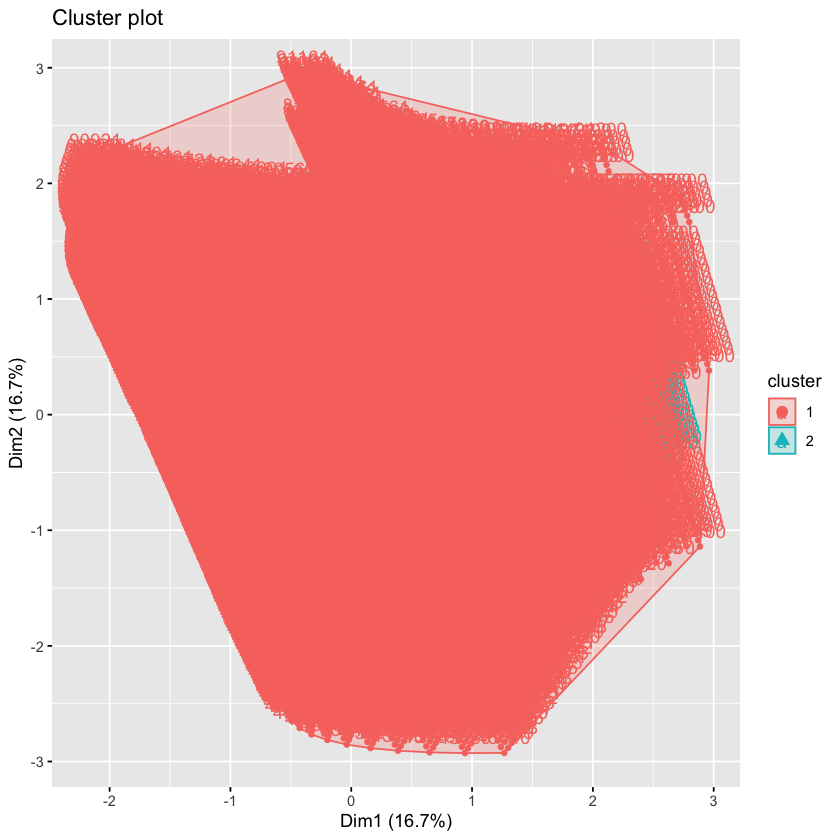

In [18]:
# illustrate clusters
fviz_cluster(Cluster_km_2, data = model_data)

### Cluster 3

In [19]:
# Cluster_km_3
c3 = Cluster_km_3$cluster
# str(Cluster_km_3)
write.csv(c3,"cluster3.csv", row.names = FALSE)

In [20]:
#將原始資料集與模型結果進行比對
final_data_3 <- data.frame(x,cluster=as.character(c3))  

#轉成dplyr格式
with_model_data_3 <- tbl_df( final_data_3 ) 

In [21]:
#New_分析各群切割變數
result <-with_model_data_3 %>% dplyr::group_by(cluster) %>% summarise(
  count = n(),
  median_A1 = median(Dim.1, na.rm = TRUE), 
  median_A2 = median(Dim.2, na.rm = TRUE),
  median_A3 = median(Dim.3, na.rm = TRUE),
  median_A4 = median(Dim.4, na.rm = TRUE),
  median_A5 = median(Dim.5, na.rm = TRUE),
  median_A6 = median(Dim.6, na.rm = TRUE)
  ) 

#結果寫出成5c6sv檔
write.table(result , file='people_kMeans_result3.csv', col.names=T, row.names=F, sep=",", quote = F) 

`summarise()` ungrouping output (override with `.groups` argument)


In [22]:
#查看各群的人
subset(final_data_3, final_data_3$cluster==1)[,1:7] 
subset(final_data_3, final_data_3$cluster==2)[,1:7] 
subset(final_data_3, final_data_3$cluster==3)[,1:7] 

,X,Sex,Age,Height,Weight,BMI,Dim.1
45601,45601,1,19,140,31.4,16,7.289410
45602,45602,1,19,141,31.8,16,7.159553
45603,45603,1,19,142,32.3,16,6.999961
45604,45604,1,19,143,32.7,16,6.859352
45605,45605,1,19,144,33.2,16,6.710596
45606,45606,1,19,145,33.6,16,6.570319
45607,45607,1,19,146,34.1,16,6.410893
45608,45608,1,19,147,34.6,16,6.250104
45609,45609,1,19,148,35.0,16,6.124296
45610,45610,1,19,149,35.5,16,5.963589


,X,Sex,Age,Height,Weight,BMI,Dim.1
25601,25601,0,51,140,31.4,16,7.583714
25602,25602,0,51,141,31.8,16,7.456625
25603,25603,0,51,142,32.3,16,7.298032
25604,25604,0,51,143,32.7,16,7.171026
25605,25605,0,51,144,33.2,16,7.013879
25606,25606,0,51,145,33.6,16,6.876370
25607,25607,0,51,146,34.1,16,6.728612
25608,25608,0,51,147,34.6,16,6.570924
25609,25609,0,51,148,35.0,16,6.436725
25610,25610,0,51,149,35.5,16,6.289622


X,Sex,Age,Height,Weight,BMI,Dim.1
1,0,19,140,31.4,16,7.309496
2,0,19,141,31.8,16,7.179639
3,0,19,142,32.3,16,7.020048
4,0,19,143,32.7,16,6.879438
5,0,19,144,33.2,16,6.730682
6,0,19,145,33.6,16,6.590405
7,0,19,146,34.1,16,6.430980
8,0,19,147,34.6,16,6.270190
9,0,19,148,35.0,16,6.144382
10,0,19,149,35.5,16,5.983676


In [23]:
100*prop.table( table(final_data_3$cluster,final_data_3$Sex) ,1) 
100*prop.table( table(final_data_3$cluster,final_data_3$Age) ,1)
100*prop.table( table(final_data_3$cluster,final_data_3$BMI) ,1)

   
      0   1
  1   0 100
  2 100   0
  3 100   0

   
          19       20       21       22       23       24       25       26
  1 1.754386 1.754386 1.754386 1.754386 1.754386 1.754386 1.754386 1.754386
  2 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
  3 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000
   
          27       28       29       30       31       32       33       34
  1 1.754386 1.754386 1.754386 1.754386 1.754386 1.754386 1.754386 1.754386
  2 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
  3 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000
   
          35       36       37       38       39       40       41       42
  1 1.754386 1.754386 1.754386 1.754386 1.754386 1.754386 1.754386 1.754386
  2 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
  3 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000 3.125000
   
          43       44       45       46       47       48       49      

   
    16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
  1  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  2  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  3  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5

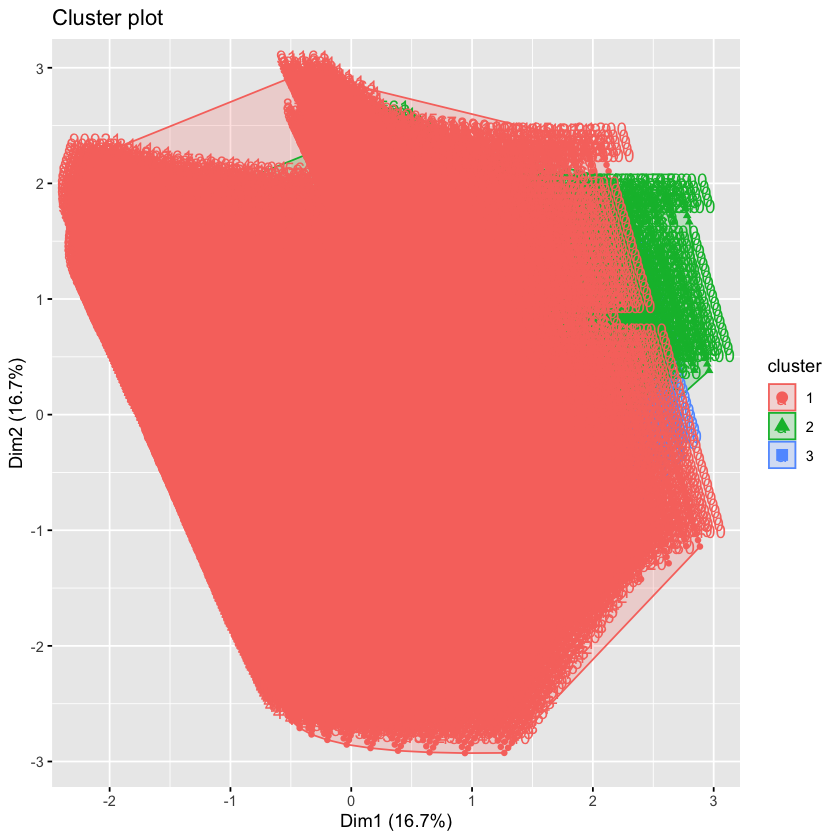

In [24]:
# illustrate clusters
fviz_cluster(Cluster_km_3, data = model_data)

### Cluster 4

In [25]:
# Cluster_km_4
c4 = Cluster_km_4$cluster
# str(Cluster_km_4)
write.csv(c4,"cluster4.csv", row.names = FALSE)

In [26]:
#將原始資料集與模型結果進行比對
final_data_4 <- data.frame(x,cluster=as.character(c4))  

#轉成dplyr格式
with_model_data_4 <- tbl_df( final_data_4 ) 

In [27]:
#New_分析各群切割變數
result <-with_model_data_4 %>% dplyr::group_by(cluster) %>% summarise(
  count = n(),
  median_A1 = median(Dim.1, na.rm = TRUE), 
  median_A2 = median(Dim.2, na.rm = TRUE),
  median_A3 = median(Dim.3, na.rm = TRUE),
  median_A4 = median(Dim.4, na.rm = TRUE),
  median_A5 = median(Dim.5, na.rm = TRUE),
  median_A6 = median(Dim.6, na.rm = TRUE)
  ) 

#結果寫出成5c6sv檔
write.table(result , file='people_kMeans_result4.csv', col.names=T, row.names=F, sep=",", quote = F) 

`summarise()` ungrouping output (override with `.groups` argument)


In [28]:
#查看各群的人
subset(final_data_4, final_data_4$cluster==1)[,1:7] 
subset(final_data_4, final_data_4$cluster==2)[,1:7] 
subset(final_data_4, final_data_4$cluster==3)[,1:7] 
subset(final_data_4, final_data_4$cluster==4)[,1:7] 

,X,Sex,Age,Height,Weight,BMI,Dim.1
25601,25601,0,51,140,31.4,16,7.583714
25602,25602,0,51,141,31.8,16,7.456625
25603,25603,0,51,142,32.3,16,7.298032
25604,25604,0,51,143,32.7,16,7.171026
25605,25605,0,51,144,33.2,16,7.013879
25606,25606,0,51,145,33.6,16,6.876370
25607,25607,0,51,146,34.1,16,6.728612
25608,25608,0,51,147,34.6,16,6.570924
25609,25609,0,51,148,35.0,16,6.436725
25610,25610,0,51,149,35.5,16,6.289622


,X,Sex,Age,Height,Weight,BMI,Dim.1
45601,45601,1,19,140,31.4,16,7.289410
45602,45602,1,19,141,31.8,16,7.159553
45603,45603,1,19,142,32.3,16,6.999961
45604,45604,1,19,143,32.7,16,6.859352
45605,45605,1,19,144,33.2,16,6.710596
45606,45606,1,19,145,33.6,16,6.570319
45607,45607,1,19,146,34.1,16,6.410893
45608,45608,1,19,147,34.6,16,6.250104
45609,45609,1,19,148,35.0,16,6.124296
45610,45610,1,19,149,35.5,16,5.963589


X,Sex,Age,Height,Weight,BMI,Dim.1
1,0,19,140,31.4,16,7.309496
2,0,19,141,31.8,16,7.179639
3,0,19,142,32.3,16,7.020048
4,0,19,143,32.7,16,6.879438
5,0,19,144,33.2,16,6.730682
6,0,19,145,33.6,16,6.590405
7,0,19,146,34.1,16,6.430980
8,0,19,147,34.6,16,6.270190
9,0,19,148,35.0,16,6.144382
10,0,19,149,35.5,16,5.983676


,X,Sex,Age,Height,Weight,BMI,Dim.1
69354,69354,1,48,173,86.8,29,-4.072508
69355,69355,1,48,174,87.8,29,-4.216420
69356,69356,1,48,175,88.8,29,-4.357648
69357,69357,1,48,176,89.8,29,-4.509369
69358,69358,1,48,177,90.9,29,-4.655502
69359,69359,1,48,178,91.9,29,-4.792787
69360,69360,1,48,179,92.9,29,-4.926024
69597,69597,1,48,176,108.4,35,-5.422209
69598,69598,1,48,177,109.7,35,-5.517616
69599,69599,1,48,178,110.9,35,-5.605597


In [29]:
100*prop.table( table(final_data_4$cluster,final_data_4$Sex) ,1) 
100*prop.table( table(final_data_4$cluster,final_data_4$Age) ,1)
100*prop.table( table(final_data_4$cluster,final_data_4$BMI) ,1)

   
      0   1
  1 100   0
  2   0 100
  3 100   0
  4   0 100

   
            19         20         21         22         23         24
  1 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  2 3.24030945 3.24030945 3.24030945 3.24030945 3.24030945 3.24030945
  3 3.12500000 3.12500000 3.12500000 3.12500000 3.12500000 3.12500000
  4 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
   
            25         26         27         28         29         30
  1 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  2 3.24030945 3.24030945 3.24030945 3.24030945 3.24030945 3.24030945
  3 3.12500000 3.12500000 3.12500000 3.12500000 3.12500000 3.12500000
  4 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
   
            31         32         33         34         35         36
  1 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  2 3.24030945 3.24030945 3.24030945 3.24030945 3.24030945 3.24030945
  3 3.12500000 3.12500000 3.12500000 3.12500000 3.12500000 3.12500000
  4 0.00

   
          16       17       18       19       20       21       22       23
  1 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000
  2 5.046782 5.046782 5.042732 5.034631 5.014379 4.994127 4.990077 4.981976
  3 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000
  4 4.944766 4.944766 4.949548 4.959112 4.983023 5.006934 5.011716 5.021281
   
          24       25       26       27       28       29       30       31
  1 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000
  2 4.969825 4.949573 4.860464 4.860464 4.860464 4.832111 5.180445 5.156142
  3 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000 5.000000
  4 5.035627 5.059538 5.164746 5.164746 5.164746 5.198221 4.786954 4.815647
   
          32       33       34       35
  1 5.000000 5.000000 5.000000 5.000000
  2 5.127790 5.079185 5.026530 4.945522
  3 5.000000 5.000000 5.000000 5.000000
  4 4.849122 4.906509 4.968677 5.064320

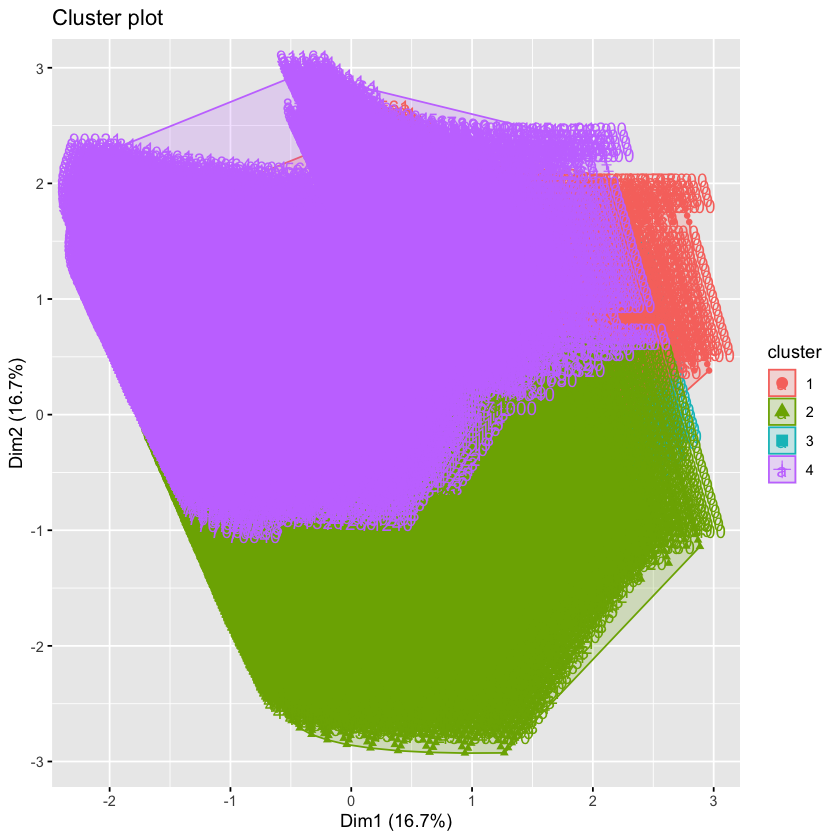

In [30]:
# illustrate clusters
fviz_cluster(Cluster_km_4, data = model_data)

### Cluster 5

In [31]:
# Cluster_km_5
c5 = Cluster_km_5$cluster
# str(Cluster_km_5)
write.csv(c5,"cluster5.csv", row.names = FALSE)

In [32]:
#將原始資料集與模型結果進行比對
final_data_5 <- data.frame(x,cluster=as.character(c5))  

#轉成dplyr格式
with_model_data_5 <- tbl_df( final_data_5 ) 

In [33]:
#New_分析各群切割變數
result <-with_model_data_5 %>% dplyr::group_by(cluster) %>% summarise(
  count = n(),
  median_A1 = median(Dim.1, na.rm = TRUE), 
  median_A2 = median(Dim.2, na.rm = TRUE),
  median_A3 = median(Dim.3, na.rm = TRUE),
  median_A4 = median(Dim.4, na.rm = TRUE),
  median_A5 = median(Dim.5, na.rm = TRUE),
  median_A6 = median(Dim.6, na.rm = TRUE)
  ) 

#結果寫出成5c6sv檔
write.table(result , file='people_kMeans_result5.csv', col.names=T, row.names=F, sep=",", quote = F) 

`summarise()` ungrouping output (override with `.groups` argument)


In [34]:
#查看各群的人
subset(final_data_5, final_data_5$cluster==1)[,1:7] 
subset(final_data_5, final_data_5$cluster==2)[,1:7] 
subset(final_data_5, final_data_5$cluster==3)[,1:7] 
subset(final_data_5, final_data_5$cluster==4)[,1:7] 
subset(final_data_5, final_data_5$cluster==5)[,1:7] 

,X,Sex,Age,Height,Weight,BMI,Dim.1
1,1,0,19,140,31.4,16,7.309496
2,2,0,19,141,31.8,16,7.179639
3,3,0,19,142,32.3,16,7.020048
4,4,0,19,143,32.7,16,6.879438
5,5,0,19,144,33.2,16,6.730682
6,6,0,19,145,33.6,16,6.590405
7,7,0,19,146,34.1,16,6.430980
8,8,0,19,147,34.6,16,6.270190
9,9,0,19,148,35.0,16,6.144382
10,10,0,19,149,35.5,16,5.983676


,X,Sex,Age,Height,Weight,BMI,Dim.1
592,592,0,19,171,87.7,30,-4.193316
593,593,0,19,172,88.8,30,-4.359005
594,594,0,19,173,89.8,30,-4.503084
595,595,0,19,174,90.8,30,-4.646248
596,596,0,19,175,91.9,30,-4.793047
597,597,0,19,176,92.9,30,-4.931164
598,598,0,19,177,94.0,30,-5.074519
599,599,0,19,178,95.1,30,-5.216960
600,600,0,19,179,96.1,30,-5.347179
631,631,0,19,170,89.6,31,-4.365497


,X,Sex,Age,Height,Weight,BMI,Dim.1
45601,45601,1,19,140,31.4,16,7.289410
45602,45602,1,19,141,31.8,16,7.159553
45603,45603,1,19,142,32.3,16,6.999961
45604,45604,1,19,143,32.7,16,6.859352
45605,45605,1,19,144,33.2,16,6.710596
45606,45606,1,19,145,33.6,16,6.570319
45607,45607,1,19,146,34.1,16,6.410893
45608,45608,1,19,147,34.6,16,6.250104
45609,45609,1,19,148,35.0,16,6.124296
45610,45610,1,19,149,35.5,16,5.963589


,X,Sex,Age,Height,Weight,BMI,Dim.1
25601,25601,0,51,140,31.4,16,7.583714
25602,25602,0,51,141,31.8,16,7.456625
25603,25603,0,51,142,32.3,16,7.298032
25604,25604,0,51,143,32.7,16,7.171026
25605,25605,0,51,144,33.2,16,7.013879
25606,25606,0,51,145,33.6,16,6.876370
25607,25607,0,51,146,34.1,16,6.728612
25608,25608,0,51,147,34.6,16,6.570924
25609,25609,0,51,148,35.0,16,6.436725
25610,25610,0,51,149,35.5,16,6.289622


,X,Sex,Age,Height,Weight,BMI,Dim.1
69201,69201,1,48,140,51.0,26,2.69396205
69202,69202,1,48,141,51.7,26,2.53219993
69203,69203,1,48,142,52.4,26,2.35808303
69204,69204,1,48,143,53.2,26,2.16916497
69205,69205,1,48,144,53.9,26,1.99764838
69206,69206,1,48,145,54.7,26,1.80996833
69207,69207,1,48,146,55.4,26,1.64064834
69208,69208,1,48,147,56.2,26,1.45549671
69209,69209,1,48,148,57.0,26,1.27244670
69241,69241,1,48,140,52.9,27,2.29200855


In [35]:
100*prop.table( table(final_data_5$cluster,final_data_5$Sex) ,1) 
100*prop.table( table(final_data_5$cluster,final_data_5$Age) ,1)
100*prop.table( table(final_data_5$cluster,final_data_5$BMI) ,1)

   
            0         1
  1 100.00000   0.00000
  2  42.13472  57.86528
  3   0.00000 100.00000
  4 100.00000   0.00000
  5   0.00000 100.00000

   
           19        20        21        22        23        24        25
  1 3.1663537 3.1663537 3.1619863 3.1532515 3.1532515 3.1532515 3.1488841
  2 1.2352828 1.2738854 1.2931866 1.3414399 1.3703918 1.3993438 1.4282957
  3 3.4820305 3.4633851 3.4587237 3.4447397 3.4307556 3.4167715 3.4074488
  4 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  5 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   
           26        27        28        29        30        31        32
  1 3.1488841 3.1401494 3.1401494 3.1401494 3.1401494 3.1357820 3.1314146
  2 1.4668983 1.5055009 1.5344528 1.5634047 1.5923567 1.6309593 1.6695619
  3 3.3888034 3.3794807 3.3654967 3.3515126 3.3375286 3.3235445 3.3095604
  4 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  5 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   
           33        34        35        36        37        38        39
  1 3.1270472 3.1270472 3.

   
           16        17        18        19        20        21        22
  1  5.590252  5.590252  5.590252  5.590252  5.590252  5.590252  5.590252
  2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
  3  5.859320  5.836014  5.808045  5.761432  5.738125  5.705496  5.668205
  4  5.453455  5.453455  5.453455  5.453455  5.453455  5.453455  5.453455
  5  5.636053  5.663600  5.696656  5.751749  5.779296  5.817861  5.861936
   
           23        24        25        26        27        28        29
  1  5.590252  5.590252  5.590252  5.590252  5.590252  5.590252  5.590252
  2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
  3  5.593623  5.593623  5.593623  5.551671  5.407169  5.407169  5.407169
  4  5.453455  5.453455  5.453455  5.453455  5.453455  5.453455  5.453455
  5  5.950085  5.950085  5.950085  5.999669  6.170459  6.170459  6.170459
   
           30        31        32        33        34        35
  1  4.118443  3.926279  3.725379  3

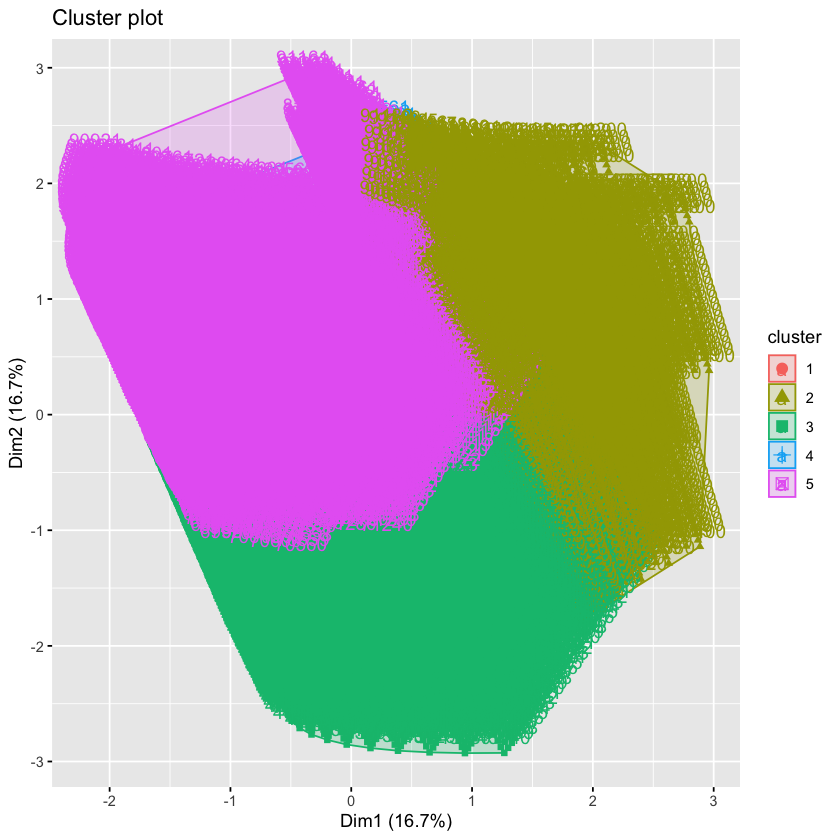

In [36]:
# illustrate clusters
fviz_cluster(Cluster_km_5, data = model_data)

### Cluster 6

In [37]:
# Cluster_km_6
c6 = Cluster_km_6$cluster
# str(Cluster_km_6)
write.csv(c6,"cluster6.csv", row.names = FALSE)

In [38]:
#將原始資料集與模型結果進行比對
final_data_6 <- data.frame(x,cluster=as.character(c6))  

#轉成dplyr格式
with_model_data_6 <- tbl_df( final_data_6 ) 

In [39]:
#New_分析各群切割變數
result <-with_model_data_6 %>% dplyr::group_by(cluster) %>% summarise(
  count = n(),
  median_A1 = median(Dim.1, na.rm = TRUE), 
  median_A2 = median(Dim.2, na.rm = TRUE),
  median_A3 = median(Dim.3, na.rm = TRUE),
  median_A4 = median(Dim.4, na.rm = TRUE),
  median_A5 = median(Dim.5, na.rm = TRUE),
  median_A6 = median(Dim.6, na.rm = TRUE)
  ) 

#結果寫出成5c6sv檔
write.table(result , file='people_kMeans_result6.csv', col.names=T, row.names=F, sep=",", quote = F) 

`summarise()` ungrouping output (override with `.groups` argument)


In [40]:
#查看各群的人
subset(final_data_6, final_data_6$cluster==1)[,1:7] 
subset(final_data_6, final_data_6$cluster==2)[,1:7] 
subset(final_data_6, final_data_6$cluster==3)[,1:7] 
subset(final_data_6, final_data_6$cluster==4)[,1:7] 
subset(final_data_6, final_data_6$cluster==5)[,1:7] 
subset(final_data_6, final_data_6$cluster==6)[,1:7] 

,X,Sex,Age,Height,Weight,BMI,Dim.1
45705,45705,1,19,164,48.4,18,2.34797962
45706,45706,1,19,165,49.0,18,2.18960328
45707,45707,1,19,166,49.6,18,2.02104668
45708,45708,1,19,167,50.2,18,1.85403123
45709,45709,1,19,168,50.8,18,1.68767027
45710,45710,1,19,169,51.4,18,1.52292333
45711,45711,1,19,170,52.0,18,1.35689513
45712,45712,1,19,171,52.6,18,1.20170264
45713,45713,1,19,172,53.3,18,1.01860669
45714,45714,1,19,173,53.9,18,0.85679283


,X,Sex,Age,Height,Weight,BMI,Dim.1
69043,69043,1,48,142,44.4,22,4.1377424568
69044,69044,1,48,143,45.0,22,3.9824670208
69045,69045,1,48,144,45.6,22,3.8164388234
69046,69046,1,48,145,46.3,22,3.6330930570
69047,69047,1,48,146,46.9,22,3.4710293718
69048,69048,1,48,147,47.5,22,3.3058335730
69081,69081,1,48,140,45.1,23,4.0180312829
69082,69082,1,48,141,45.7,23,3.8523358493
69083,69083,1,48,142,46.4,23,3.6728716488
69084,69084,1,48,143,47.0,23,3.5182617403


,X,Sex,Age,Height,Weight,BMI,Dim.1
1,1,0,19,140,31.4,16,7.309496
2,2,0,19,141,31.8,16,7.179639
3,3,0,19,142,32.3,16,7.020048
4,4,0,19,143,32.7,16,6.879438
5,5,0,19,144,33.2,16,6.730682
6,6,0,19,145,33.6,16,6.590405
7,7,0,19,146,34.1,16,6.430980
8,8,0,19,147,34.6,16,6.270190
9,9,0,19,148,35.0,16,6.144382
10,10,0,19,149,35.5,16,5.983676


,X,Sex,Age,Height,Weight,BMI,Dim.1
112,112,0,19,171,52.6,18,1.22178889
113,113,0,19,172,53.3,18,1.03869294
114,114,0,19,173,53.9,18,0.87687907
115,115,0,19,174,54.5,18,0.71168327
116,116,0,19,175,55.1,18,0.54995330
117,117,0,19,176,55.8,18,0.37004025
118,118,0,19,177,56.4,18,0.22142556
119,119,0,19,178,57.0,18,0.05891397
120,120,0,19,179,57.7,18,-0.12058338
137,137,0,19,156,46.2,19,3.10722647


,X,Sex,Age,Height,Weight,BMI,Dim.1
592,592,0,19,171,87.7,30,-4.193316
593,593,0,19,172,88.8,30,-4.359005
594,594,0,19,173,89.8,30,-4.503084
595,595,0,19,174,90.8,30,-4.646248
596,596,0,19,175,91.9,30,-4.793047
597,597,0,19,176,92.9,30,-4.931164
598,598,0,19,177,94.0,30,-5.074519
599,599,0,19,178,95.1,30,-5.216960
600,600,0,19,179,96.1,30,-5.347179
631,631,0,19,170,89.6,31,-4.365497


,X,Sex,Age,Height,Weight,BMI,Dim.1
25601,25601,0,51,140,31.4,16,7.583714
25602,25602,0,51,141,31.8,16,7.456625
25603,25603,0,51,142,32.3,16,7.298032
25604,25604,0,51,143,32.7,16,7.171026
25605,25605,0,51,144,33.2,16,7.013879
25606,25606,0,51,145,33.6,16,6.876370
25607,25607,0,51,146,34.1,16,6.728612
25608,25608,0,51,147,34.6,16,6.570924
25609,25609,0,51,148,35.0,16,6.436725
25610,25610,0,51,149,35.5,16,6.289622


In [41]:
100*prop.table( table(final_data_6$cluster,final_data_6$Sex) ,1) 
100*prop.table( table(final_data_6$cluster,final_data_6$Age) ,1)
100*prop.table( table(final_data_6$cluster,final_data_6$BMI) ,1)

   
            0         1
  1   0.00000 100.00000
  2   0.00000 100.00000
  3  32.99632  67.00368
  4 100.00000   0.00000
  5  43.09442  56.90558
  6 100.00000   0.00000

   
            19         20         21         22         23         24
  1 3.80373219 3.77392238 3.74411256 3.70834079 3.68449294 3.64872116
  2 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  3 2.09065204 2.10778854 2.11635678 2.13349327 2.14206152 2.16776626
  4 3.12565226 3.12043415 3.12565226 3.13087038 3.13087038 3.12565226
  5 1.19790618 1.23817193 1.26837125 1.29857057 1.32876988 1.36903564
  6 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
   
            25         26         27         28         29         30
  1 3.61891135 3.57717761 3.53544387 3.51159602 3.46986228 3.42812854
  2 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  3 2.16776626 2.20203924 2.23631223 2.25344872 2.29628995 2.30485820
  4 3.13608850 3.13087038 3.12565226 3.12565226 3.12565226 3.13087038
  5 1.39923495 1.43950070 1.47976646 1.49989934 1.52003221 1.57036441
  6 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
   
        

   
             16          17          18          19          20          21
  1  0.00000000  0.00000000  0.72139748  2.50402432  4.91265725  6.46872951
  2  0.17584994  1.27654032  3.00898789  4.80005210  6.14823499  6.83860883
  3 30.27161340 28.82357981 22.08037015 12.97232457  4.55830691  1.24239568
  4  0.00000000  0.00000000  2.08724692  4.63890628  6.57482780  6.67919015
  5  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  6  5.46328671  5.46328671  5.46328671  5.46328671  5.46328671  5.46328671
   
             22          23          24          25          26          27
  1  7.08877362  7.12454540  7.14839325  7.15435521  7.15435521  7.15435521
  2  7.06656246  7.06656246  7.04051062  7.03399766  7.03399766  7.03399766
  3  0.05140948  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  4  6.67919015  6.67919015  6.67919015  6.67919015  6.67919015  6.67919015
  5  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  6 

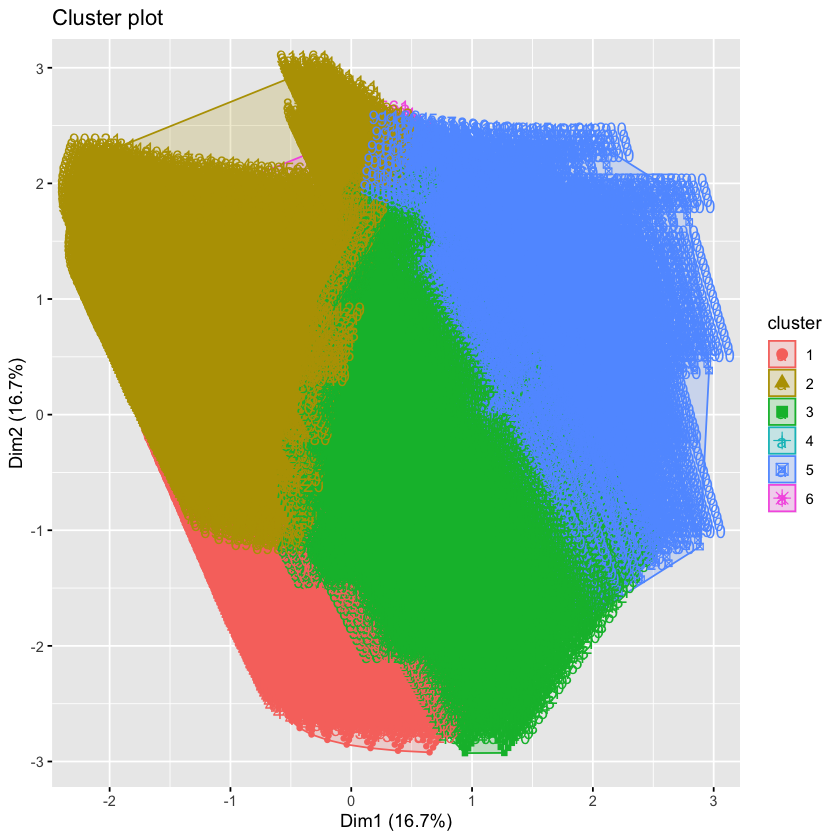

In [42]:
# illustrate clusters
fviz_cluster(Cluster_km_6, data = model_data)

### Cluster 7

In [43]:
# Cluster_km_7
c7 = Cluster_km_7$cluster
# str(Cluster_km_7)
write.csv(c7,"cluster7.csv", row.names = FALSE)

In [44]:
#將原始資料集與模型結果進行比對
final_data_7 <- data.frame(x,cluster=as.character(c7))  

#轉成dplyr格式
with_model_data_7 <- tbl_df( final_data_7 )  

In [45]:
#New_分析各群切割變數
result <-with_model_data_7 %>% dplyr::group_by(cluster) %>% summarise(
  count = n(),
  median_A1 = median(Dim.1, na.rm = TRUE), 
  median_A2 = median(Dim.2, na.rm = TRUE),
  median_A3 = median(Dim.3, na.rm = TRUE),
  median_A4 = median(Dim.4, na.rm = TRUE),
  median_A5 = median(Dim.5, na.rm = TRUE),
  median_A6 = median(Dim.6, na.rm = TRUE)
  ) 

#結果寫出成5c6sv檔
write.table(result , file='people_kMeans_result7.csv', col.names=T, row.names=F, sep=",", quote = F) 

`summarise()` ungrouping output (override with `.groups` argument)


In [46]:
#查看各群的人
subset(final_data_7, final_data_7$cluster==1)[,1:7] 
subset(final_data_7, final_data_7$cluster==2)[,1:7] 
subset(final_data_7, final_data_7$cluster==3)[,1:7] 
subset(final_data_7, final_data_7$cluster==4)[,1:7] 
subset(final_data_7, final_data_7$cluster==5)[,1:7] 
subset(final_data_7, final_data_7$cluster==6)[,1:7] 
subset(final_data_7, final_data_7$cluster==7)[,1:7] 

,X,Sex,Age,Height,Weight,BMI,Dim.1
45749,45749,1,19,168,53.6,19,1.06433607
45750,45750,1,19,169,54.3,19,0.88553740
45751,45751,1,19,170,54.9,19,0.73344580
45752,45752,1,19,171,55.6,19,0.55378256
45753,45753,1,19,172,56.2,19,0.39458101
45754,45754,1,19,173,56.9,19,0.21726921
45755,45755,1,19,174,57.5,19,0.05695327
45756,45756,1,19,175,58.2,19,-0.11816192
45757,45757,1,19,176,58.9,19,-0.28380561
45758,45758,1,19,177,59.5,19,-0.44345603


,X,Sex,Age,Height,Weight,BMI,Dim.1
69082,69082,1,48,141,45.7,23,3.85233585
69083,69083,1,48,142,46.4,23,3.67287165
69084,69084,1,48,143,47.0,23,3.51826174
69085,69085,1,48,144,47.7,23,3.33776610
69086,69086,1,48,145,48.4,23,3.15921725
69121,69121,1,48,140,47.0,24,3.58475846
69855,69855,1,49,154,52.2,22,2.11136150
69856,69856,1,49,155,52.9,22,1.93471523
69857,69857,1,49,156,53.5,22,1.78775331
69858,69858,1,49,157,54.2,22,1.61491671


,X,Sex,Age,Height,Weight,BMI,Dim.1
1,1,0,19,140,31.4,16,7.309496
2,2,0,19,141,31.8,16,7.179639
3,3,0,19,142,32.3,16,7.020048
4,4,0,19,143,32.7,16,6.879438
5,5,0,19,144,33.2,16,6.730682
6,6,0,19,145,33.6,16,6.590405
7,7,0,19,146,34.1,16,6.430980
8,8,0,19,147,34.6,16,6.270190
9,9,0,19,148,35.0,16,6.144382
10,10,0,19,149,35.5,16,5.983676


,X,Sex,Age,Height,Weight,BMI,Dim.1
45601,45601,1,19,140,31.4,16,7.289410
45602,45602,1,19,141,31.8,16,7.159553
45603,45603,1,19,142,32.3,16,6.999961
45604,45604,1,19,143,32.7,16,6.859352
45605,45605,1,19,144,33.2,16,6.710596
45606,45606,1,19,145,33.6,16,6.570319
45607,45607,1,19,146,34.1,16,6.410893
45608,45608,1,19,147,34.6,16,6.250104
45609,45609,1,19,148,35.0,16,6.124296
45610,45610,1,19,149,35.5,16,5.963589


,X,Sex,Age,Height,Weight,BMI,Dim.1
27,27,0,19,166,44.1,16,3.3415788
28,28,0,19,167,44.6,16,3.1994397
29,29,0,19,168,45.2,16,3.0264622
30,30,0,19,169,45.7,16,2.8719674
31,31,0,19,170,46.2,16,2.7208555
32,32,0,19,171,46.8,16,2.5575993
33,33,0,19,172,47.3,16,2.4069870
34,34,0,19,173,47.9,16,2.2349968
35,35,0,19,174,48.4,16,2.0847173
36,36,0,19,175,49.0,16,1.9132266


,X,Sex,Age,Height,Weight,BMI,Dim.1
25601,25601,0,51,140,31.4,16,7.583714
25602,25602,0,51,141,31.8,16,7.456625
25603,25603,0,51,142,32.3,16,7.298032
25604,25604,0,51,143,32.7,16,7.171026
25605,25605,0,51,144,33.2,16,7.013879
25606,25606,0,51,145,33.6,16,6.876370
25607,25607,0,51,146,34.1,16,6.728612
25608,25608,0,51,147,34.6,16,6.570924
25609,25609,0,51,148,35.0,16,6.436725
25610,25610,0,51,149,35.5,16,6.289622


,X,Sex,Age,Height,Weight,BMI,Dim.1
589,589,0,19,168,84.7,30,-3.743787
590,590,0,19,169,85.7,30,-3.896179
591,591,0,19,170,86.7,30,-4.044191
592,592,0,19,171,87.7,30,-4.193316
593,593,0,19,172,88.8,30,-4.359005
594,594,0,19,173,89.8,30,-4.503084
595,595,0,19,174,90.8,30,-4.646248
596,596,0,19,175,91.9,30,-4.793047
597,597,0,19,176,92.9,30,-4.931164
598,598,0,19,177,94.0,30,-5.074519


In [47]:
100*prop.table( table(final_data_7$cluster,final_data_7$Sex) ,1) 
100*prop.table( table(final_data_7$cluster,final_data_7$Age) ,1)
100*prop.table( table(final_data_7$cluster,final_data_7$BMI) ,1)

   
            0         1
  1   0.00000 100.00000
  2   0.00000 100.00000
  3 100.00000   0.00000
  4   0.00000 100.00000
  5 100.00000   0.00000
  6 100.00000   0.00000
  7  45.39901  54.60099

   
            19         20         21         22         23         24
  1 3.79633192 3.77068103 3.73220469 3.69372836 3.66166474 3.61677568
  2 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  3 3.18389606 3.16785628 3.16785628 3.16785628 3.16785628 3.16785628
  4 1.63765578 1.65825523 1.68915439 1.72005356 1.75095272 1.79215161
  5 3.10571177 3.11550896 3.11550896 3.11550896 3.11550896 3.11550896
  6 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  7 1.33004926 1.35960591 1.38916256 1.41871921 1.43842365 1.46798030
   
            25         26         27         28         29         30
  1 3.57188662 3.53341029 3.49493395 3.46287033 3.41798127 3.39233038
  2 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  3 3.15983639 3.15983639 3.15983639 3.15983639 3.15181650 3.15181650
  4 1.84365022 1.88484911 1.91574827 1.93634772 1.97754661 1.99814605
  5 3.11550896 3.11550896 3.11550896 3.11550896 3.11550896 3.11550896
  6 0.000000

   
             16          17          18          19          20          21
  1  0.00000000  0.00000000  0.00000000  0.35911248  2.09054765  4.88649481
  2  0.11521518  1.25381227  2.57539817  4.07997289  5.52355134  6.57404270
  3  6.60036891  6.11917556  5.65402197  5.28510707  4.87609271  4.61945625
  4 23.30827068 21.57791740 19.56947162 16.70614893 11.73138325  5.64424761
  5  4.47731949  5.06515137  5.63338885  6.08405996  6.58371706  6.89722739
  6  5.45970736  5.45970736  5.45970736  5.45970736  5.45970736  5.45970736
  7  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
   
             22          23          24          25          26          27
  1  6.96421701  7.72091830  7.80428370  7.84917276  7.88123637  7.91971271
  2  7.14334124  7.27888851  7.20433751  7.15689597  7.12300915  7.08234497
  3  4.35479990  4.07410378  3.84954688  3.59291042  3.33627396  3.33627396
  4  1.44196107  0.02059944  0.00000000  0.00000000  0.00000000  0.00000000
  5 

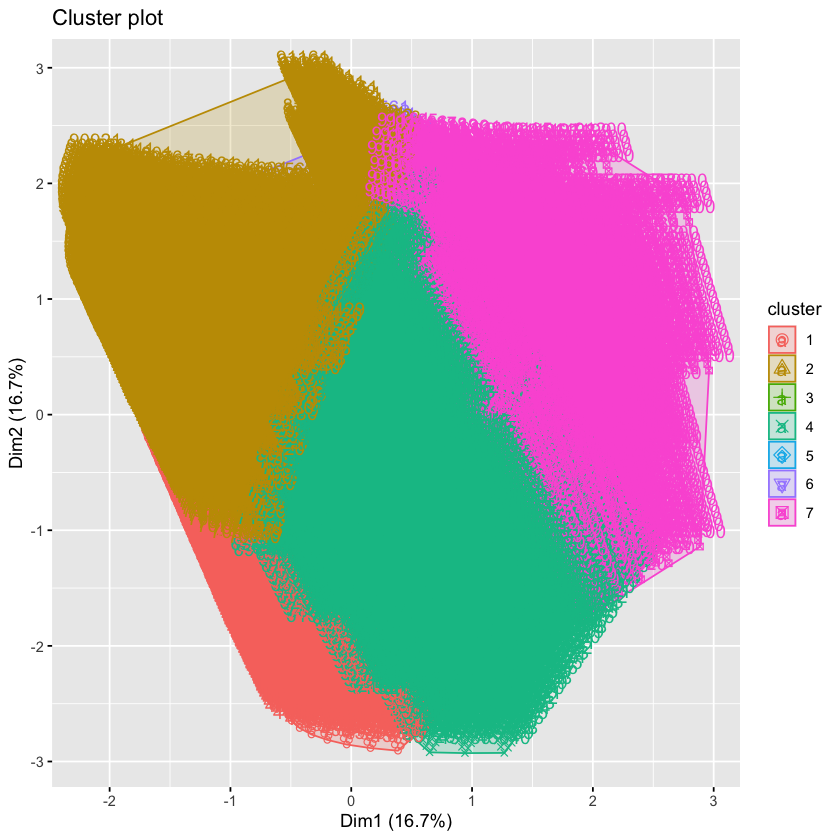

In [48]:
# illustrate clusters
fviz_cluster(Cluster_km_7, data = model_data)

### Cluster 8

In [49]:
# Cluster_km_8
c8 = Cluster_km_8$cluster
# str(Cluster_km_8)
write.csv(c8,"cluster8.csv", row.names = FALSE)

In [50]:
#將原始資料集與模型結果進行比對
final_data_8 <- data.frame(x,cluster=as.character(c8))  

#轉成dplyr格式
with_model_data_8 <- tbl_df( final_data_8 ) 

In [51]:
#New_分析各群切割變數
result <-with_model_data_8 %>% dplyr::group_by(cluster) %>% summarise(
  count = n(),
  median_A1 = median(Dim.1, na.rm = TRUE), 
  median_A2 = median(Dim.2, na.rm = TRUE),
  median_A3 = median(Dim.3, na.rm = TRUE),
  median_A4 = median(Dim.4, na.rm = TRUE),
  median_A5 = median(Dim.5, na.rm = TRUE),
  median_A6 = median(Dim.6, na.rm = TRUE)
  ) 

#結果寫出成5c6sv檔
write.table(result , file='people_kMeans_result8.csv', col.names=T, row.names=F, sep=",", quote = F) 

`summarise()` ungrouping output (override with `.groups` argument)


In [52]:
#查看各群的人
subset(final_data_8, final_data_8$cluster==1)[,1:7] 
subset(final_data_8, final_data_8$cluster==2)[,1:7] 
subset(final_data_8, final_data_8$cluster==3)[,1:7] 
subset(final_data_8, final_data_8$cluster==4)[,1:7] 
subset(final_data_8, final_data_8$cluster==5)[,1:7] 
subset(final_data_8, final_data_8$cluster==6)[,1:7] 
subset(final_data_8, final_data_8$cluster==7)[,1:7] 
subset(final_data_8, final_data_8$cluster==8)[,1:7] 

,X,Sex,Age,Height,Weight,BMI,Dim.1
1,1,0,19,140,31.4,16,7.309496
2,2,0,19,141,31.8,16,7.179639
3,3,0,19,142,32.3,16,7.020048
4,4,0,19,143,32.7,16,6.879438
5,5,0,19,144,33.2,16,6.730682
6,6,0,19,145,33.6,16,6.590405
7,7,0,19,146,34.1,16,6.430980
8,8,0,19,147,34.6,16,6.270190
9,9,0,19,148,35.0,16,6.144382
10,10,0,19,149,35.5,16,5.983676


,X,Sex,Age,Height,Weight,BMI,Dim.1
26161,26161,0,51,140,58.8,30,1.617313577
26162,26162,0,51,141,59.6,30,1.451228223
26163,26163,0,51,142,60.5,30,1.260671141
26164,26164,0,51,143,61.3,30,1.088298124
26165,26165,0,51,144,62.2,30,0.902455007
26166,26166,0,51,145,63.1,30,0.715581404
26167,26167,0,51,146,63.9,30,0.544538491
26168,26168,0,51,147,64.8,30,0.358580233
26169,26169,0,51,148,65.7,30,0.187589066
26170,26170,0,51,149,66.6,30,0.009976521


,X,Sex,Age,Height,Weight,BMI,Dim.1
45640,45640,1,19,179,51.3,16,1.2479972
45669,45669,1,19,168,48.0,17,2.3313251
45670,45670,1,19,169,48.6,17,2.1601672
45671,45671,1,19,170,49.1,17,2.0209732
45672,45672,1,19,171,49.7,17,1.8537799
45673,45673,1,19,172,50.3,17,1.6864317
45674,45674,1,19,173,50.9,17,1.5181249
45675,45675,1,19,174,51.5,17,1.3493285
45676,45676,1,19,175,52.1,17,1.1953344
45677,45677,1,19,176,52.7,17,1.0292232


,X,Sex,Age,Height,Weight,BMI,Dim.1
67354,67354,1,46,173,56.9,19,0.55845147
67355,67355,1,46,174,57.5,19,0.40106956
67356,67356,1,46,175,58.2,19,0.22913821
67357,67357,1,46,176,58.9,19,0.05535312
67358,67358,1,46,177,59.5,19,-0.08689483
67359,67359,1,46,178,60.2,19,-0.25654759
67360,67360,1,46,179,60.9,19,-0.42748160
67394,67394,1,46,173,59.9,20,-0.03278915
67395,67395,1,46,174,60.6,20,-0.20322352
67396,67396,1,46,175,61.2,20,-0.35555776


,X,Sex,Age,Height,Weight,BMI,Dim.1
73,73,0,19,172,50.3,17,1.70651792
74,74,0,19,173,50.9,17,1.53821113
75,75,0,19,174,51.5,17,1.36941480
76,76,0,19,175,52.1,17,1.21542061
77,77,0,19,176,52.7,17,1.04930947
78,78,0,19,177,53.3,17,0.88489529
79,79,0,19,178,53.9,17,0.71895004
80,80,0,19,179,54.5,17,0.55325461
105,105,0,19,164,48.4,18,2.36806586
106,106,0,19,165,49.0,18,2.20968953


,X,Sex,Age,Height,Weight,BMI,Dim.1
25612,25612,0,51,151,36.5,16,5.975951
25613,25613,0,51,152,37.0,16,5.832658
25614,25614,0,51,153,37.5,16,5.677166
25615,25615,0,51,154,37.9,16,5.541686
25616,25616,0,51,155,38.4,16,5.397029
25617,25617,0,51,156,38.9,16,5.241702
25618,25618,0,51,157,39.4,16,5.088239
25619,25619,0,51,158,39.9,16,4.944237
25620,25620,0,51,159,40.4,16,4.791023
25621,25621,0,51,160,41.0,16,4.616182


,X,Sex,Age,Height,Weight,BMI,Dim.1
46280,46280,1,19,179,102.5,32,-5.862646
46317,46317,1,19,176,102.2,33,-5.711995
46318,46318,1,19,177,103.4,33,-5.837085
46319,46319,1,19,178,104.6,33,-5.950102
46320,46320,1,19,179,105.7,33,-6.066103
46354,46354,1,19,173,101.8,34,-5.558136
46355,46355,1,19,174,102.9,34,-5.677987
46356,46356,1,19,175,104.1,34,-5.789223
46357,46357,1,19,176,105.3,34,-5.908601
46358,46358,1,19,177,106.5,34,-6.015905


,X,Sex,Age,Height,Weight,BMI,Dim.1
561,561,0,19,140,58.8,30,1.18192708
562,562,0,19,141,59.6,30,1.00004224
563,563,0,19,142,60.5,30,0.80418959
564,564,0,19,143,61.3,30,0.62644717
565,565,0,19,144,62.2,30,0.43522457
566,566,0,19,145,63.1,30,0.24272165
567,567,0,19,146,63.9,30,0.07034768
568,568,0,19,147,64.8,30,-0.11937700
569,569,0,19,148,65.7,30,-0.30650042
570,570,0,19,149,66.6,30,-0.49142819


In [53]:
100*prop.table( table(final_data_8$cluster,final_data_8$Sex) ,1) 
100*prop.table( table(final_data_8$cluster,final_data_8$Age) ,1)
100*prop.table( table(final_data_8$cluster,final_data_8$BMI) ,1)

   
            0         1
  1  34.46368  65.53632
  2 100.00000   0.00000
  3   0.00000 100.00000
  4   0.00000 100.00000
  5 100.00000   0.00000
  6 100.00000   0.00000
  7   0.00000 100.00000
  8 100.00000   0.00000

   
           19        20        21        22        23        24        25
  1 1.9364626 1.9543102 1.9721578 1.9989291 2.0346243 2.0524719 2.0881671
  2 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  3 4.5943764 4.5405624 4.4934750 4.4396610 4.3791201 4.3320328 4.2647652
  4 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  5 3.0539674 3.0679124 3.0748850 3.0748850 3.0748850 3.0748850 3.0748850
  6 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  7 0.2060890 0.2435597 0.2810304 0.3278689 0.3747073 0.4215457 0.4777518
  8 3.1250000 3.1250000 3.1250000 3.1250000 3.1250000 3.1250000 3.1250000
   
           26        27        28        29        30        31        32
  1 2.1060146 2.1238622 2.1327860 2.1595574 2.2041763 2.2487953 2.2844905
  2 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  3 4.2042244 4.1369568 4.0629625 3.9755146 3.9015202 3.7938921 3.7131710
  4 0.0000000 0.0000000 0.0000

   
              16           17           18           19           20
  1 32.991254685 26.030697840 19.275388185 12.457611994  6.558986257
  2  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
  3  0.006726759  0.578501278  1.970940401  3.726624512  5.374680479
  4  0.825796304  2.225717656  4.073928431  6.000786473  7.432166732
  5  0.062752754  2.133593641  4.106819133  5.905731418  7.537303026
  6  5.453484981  7.057451152  7.290755322  7.290755322  7.290755322
  7  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
  8  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
   
              21           22           23           24           25
  1  2.123862217  0.544351240  0.017847582  0.000000000  0.000000000
  2  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
  3  6.672944975  7.399434952  7.688685591  7.708865868  7.708865868
  4  8.336610303  8.800629178  8.926464805  8.918600079  8.918600079
  5  8.855110863  8.924836

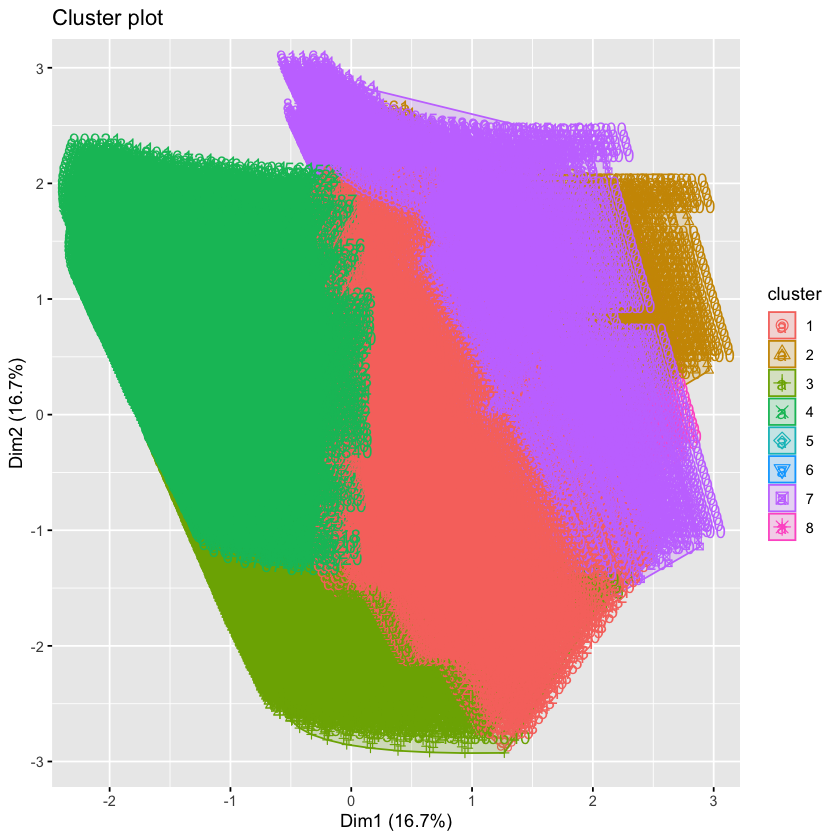

In [54]:
# illustrate clusters
fviz_cluster(Cluster_km_8, data = model_data)

In [55]:
#plots to compare
p1 <- fviz_cluster(Cluster_km_2, geom = "point", data = model_data) + ggtitle("k = 2")

In [56]:
p2 <- fviz_cluster(Cluster_km_3, geom = "point",  data = model_data) + ggtitle("k = 3")

In [57]:
p3 <- fviz_cluster(Cluster_km_4, geom = "point",  data = model_data) + ggtitle("k = 4")

In [58]:
p4 <- fviz_cluster(Cluster_km_5, geom = "point",  data = model_data) + ggtitle("k = 5")

In [59]:
p5 <- fviz_cluster(Cluster_km_6, geom = "point",  data = model_data) + ggtitle("k = 6")

In [60]:
p6 <- fviz_cluster(Cluster_km_7, geom = "point",  data = model_data) + ggtitle("k = 7")

In [61]:
p7 <- fviz_cluster(Cluster_km_8, geom = "point",  data = model_data) + ggtitle("k = 8")

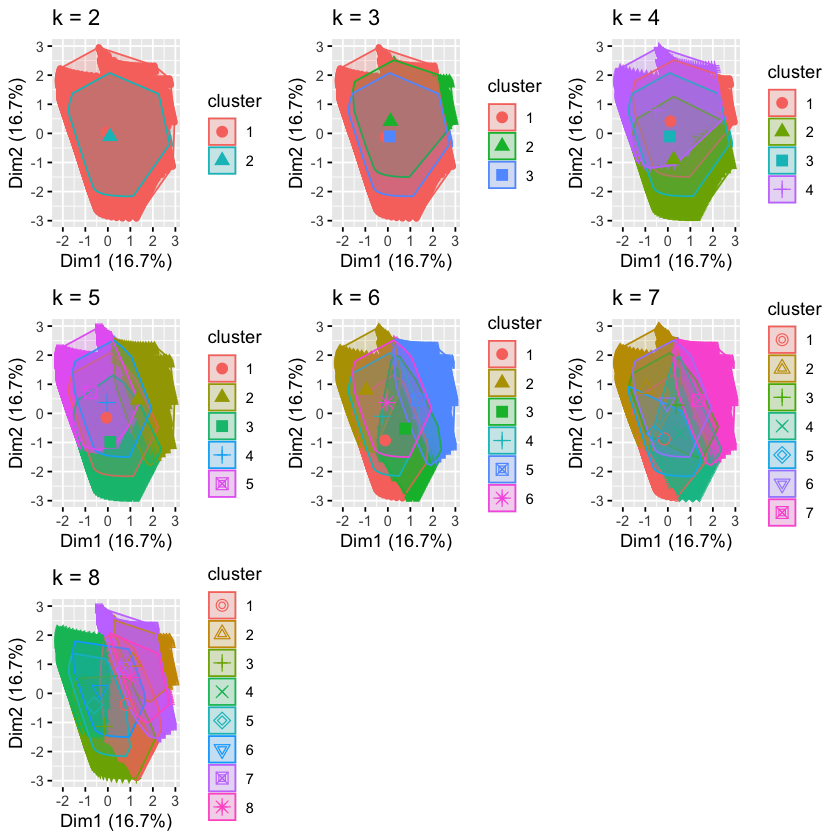

In [62]:
library(gridExtra)
grid.arrange(p1, p2, p3, p4, p5, p6, p7,nrow = 3) # Arrange multiple grobs on a page (將不會影響到par()中參數設定)